In [1]:
import pandas as pd
pd.set_option('display.max_row',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.unicode.east_asian_width',True) 
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [2]:

from matplotlib import font_manager,rc
import matplotlib
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['axes.unicode_minus']=False
rc('font',family=font_name)

In [3]:
embedding_model = Word2Vec.load('./model/word2VecModel_book.model')

In [4]:
print(embedding_model.wv.vocab.keys())
print(len(embedding_model.wv.vocab.keys()))

dict_keys(['오늘', '선정', '평범하다', '사람', '경제학', '넘치다', '모자라다', '해답', '살아가다', '중도', '배우다', '가다', '과정', '것이므', '통해', '어떻다', '합리', '인간', '사고', '보여주다', '난해하다', '지식', '나열하다', '대신', '다양하다', '사회', '현안', '프리즘', '심하다', '들이다', '부자', '빈민', '이면', '토론', '진행자', '맡다', '유시민', '복귀', '처음', '내놓다', '빠지다', '기존', '비판', '자유', '신선하다', '발상', '존재', '중심', '뜨겁다', '이야기', '카페', '차리다', '초대', '특유', '차분하다', '직설', '날카롭다', '어조', '일반', '정의', '거꾸로', '생각', '시작', '무한', '물질', '욕구', '충족', '위해', '자원', '활용', '연구', '학문', '가지', '먹다', '동물', '이기', '때문', '영화', '야하다', '정신', '지니다', '꼬집다', '대박', '제목', '판단력', '결여', '치부', '노름', '살펴보다', '단순하다', '따다', '중요하다', '도박', '스릴', '오락', '재미', '심리', '만족', '측면', '지적', '그렇다', '위험하다', '매력', '이성', '열정', '강력하다', '초적', '본능', '주식', '투자', '날리다', '국가', '물다', '데모', '스스로', '좇는', '장렬', '경제', '당당하다', '권리', '덩어리', '살다', '문제', '관점', '접근', '수요', '공급', '이론', '독점', '한계효용', '로렌츠', '곡선', '적용', '풀다', '간다', '무턱', '대고', '쉬다', '쓸다', '그래프', '도형', '공식', '실리다', '불구', '무미건조하다', '수학', '냄새', '독특하다', '마지막', '깊이', '알다', '권장', '목록', '친절

In [5]:

key_word = '대통령'
sim_word = embedding_model.wv.most_similar(key_word,topn=30)
print(sim_word)

[('부통령', 0.6827644109725952), ('김대중', 0.6767028570175171), ('행정부', 0.6729047894477844), ('선거', 0.6725701093673706), ('노무현', 0.667962908744812), ('정부', 0.6623095870018005), ('총선', 0.651225209236145), ('대선', 0.639592170715332), ('클린턴', 0.6370182037353516), ('민주당', 0.6353418827056885), ('부시', 0.6341245174407959), ('장관', 0.6259565353393555), ('의회', 0.6257419586181641), ('취임', 0.6236404180526733), ('탄핵', 0.6194600462913513), ('트럼프', 0.6176471710205078), ('오바마', 0.6101340651512146), ('후보', 0.6100957989692688), ('이승만', 0.6094663739204407), ('이명박', 0.6036310195922852), ('백악관', 0.5999237298965454), ('연방', 0.5977495312690735), ('문재인', 0.5766913890838623), ('공직', 0.5740598440170288), ('사법부', 0.5735558867454529), ('국회의원', 0.5706584453582764), ('선출', 0.5688872933387756), ('정권', 0.5679458975791931), ('정치인', 0.5659916996955872), ('대통령선거', 0.565676212310791)]


In [6]:
print(sim_word[0][0])
print(embedding_model[sim_word[0][0]])

부통령
[ 0.40801337  0.8423064   0.04784042  0.65099925 -0.49531385  0.03231807
 -0.2022952  -0.11606376  0.2583759   0.25293162 -0.42488205  0.794917
  0.32190055  0.21947466  0.45520017 -0.13707845  0.42664152 -1.3018798
 -0.54680026  0.42655322  0.9936168   1.2770617  -0.6717835  -0.79671854
 -1.3942654  -0.27756953 -1.2053102  -0.3939474  -0.25890625 -0.5719098
  0.58174413 -0.00968454  0.4801364   0.47366887  1.0193706  -0.29378858
 -0.6644296  -0.10994228 -0.23055026 -0.2536299  -0.56453985  0.27742484
 -0.05184437  0.8576366   0.3766629   0.42399606  0.51732427 -1.028277
 -0.54272956 -0.6768453   0.23127852 -0.16115868 -0.4593146   0.7935988
 -0.48749384 -1.3706268  -0.53638124  0.23891212 -0.80518335  0.03156856
 -0.13439803  0.41320962 -0.11447365  0.24380428  0.5983031  -0.05278493
 -0.43735212 -1.1091529   0.07071236  0.34988472  0.45642883  0.04687383
  1.2178025   0.36371475  0.49454656  0.461439   -0.12449382 -0.62112707
 -0.0682845  -0.32452214  0.06270476  0.3460694  -0.07

c:\users\023\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
#word 단위로 시각화하기 
tokens = []
labels = []
for i in sim_word:
    labels.append(i[0])
    tokens.append(embedding_model[i[0]])

c:\users\023\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [8]:
print(tokens[0])
print(len(tokens[0]))
print(labels) 

[ 0.40801337  0.8423064   0.04784042  0.65099925 -0.49531385  0.03231807
 -0.2022952  -0.11606376  0.2583759   0.25293162 -0.42488205  0.794917
  0.32190055  0.21947466  0.45520017 -0.13707845  0.42664152 -1.3018798
 -0.54680026  0.42655322  0.9936168   1.2770617  -0.6717835  -0.79671854
 -1.3942654  -0.27756953 -1.2053102  -0.3939474  -0.25890625 -0.5719098
  0.58174413 -0.00968454  0.4801364   0.47366887  1.0193706  -0.29378858
 -0.6644296  -0.10994228 -0.23055026 -0.2536299  -0.56453985  0.27742484
 -0.05184437  0.8576366   0.3766629   0.42399606  0.51732427 -1.028277
 -0.54272956 -0.6768453   0.23127852 -0.16115868 -0.4593146   0.7935988
 -0.48749384 -1.3706268  -0.53638124  0.23891212 -0.80518335  0.03156856
 -0.13439803  0.41320962 -0.11447365  0.24380428  0.5983031  -0.05278493
 -0.43735212 -1.1091529   0.07071236  0.34988472  0.45642883  0.04687383
  1.2178025   0.36371475  0.49454656  0.461439   -0.12449382 -0.62112707
 -0.0682845  -0.32452214  0.06270476  0.3460694  -0.074661

In [9]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca',n_iter=2500,random_state=23)

In [10]:
#차원축소
df_tokens = pd.DataFrame(tokens) 
df_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.408013,0.842306,0.047840,0.650999,-0.495314,0.032318,-0.202295,-0.116064,0.258376,0.252932,-0.424882,0.794917,0.321901,0.219475,0.455200,-0.137078,0.426642,-1.301880,-0.546800,0.426553,0.993617,1.277062,-0.671784,-0.796719,-1.394265,-0.277570,-1.205310,-0.393947,-0.258906,-0.571910,0.581744,-0.009685,0.480136,0.473669,1.019371,-0.293789,-0.664430,-0.109942,-0.230550,-0.253630,-0.564540,0.277425,-0.051844,0.857637,0.376663,0.423996,0.517324,-1.028277,-0.542730,-0.676845,0.231279,-0.161159,-0.459315,0.793599,-0.487494,-1.370627,-0.536381,0.238912,-0.805183,0.031569,-0.134398,0.413210,-0.114474,0.243804,0.598303,-0.052785,-0.437352,-1.109153,0.070712,0.349885,0.456429,0.046874,1.217803,0.363715,0.494547,0.461439,-0.124494,-0.621127,-0.068284,-0.324522,0.062705,0.346069,-0.074661,-0.394216,0.996126,0.676766,-0.974381,0.375539,0.285122,0.252436,-0.004772,-1.022280,-0.313476,0.348390,0.417055,-0.033294,0.018605,-0.153394,0.817740,0.456898
1,-0.264674,0.114532,-0.056308,1.324840,-0.056666,0.215339,-0.309442,-0.222381,-0.497280,-0.200210,-0.005127,0.385714,0.161209,0.147345,0.247359,-0.356889,0.564496,-0.146062,-0.367335,-0.095858,-0.079456,0.488074,0.000432,-0.332668,-0.032182,-0.898782,-0.680845,-0.932849,-0.220669,-0.322059,-0.225756,-0.164898,0.656374,-0.033019,-0.274304,-0.599162,-0.089060,-0.923827,0.212626,-0.335614,0.575543,0.155632,0.116401,0.336904,0.269308,0.423503,-0.711802,-0.746806,-0.271317,0.243157,0.528666,-0.153378,0.257954,0.208482,-0.841998,0.013288,0.084231,0.615846,-0.270245,0.571787,0.624257,0.595095,-0.118434,0.202717,-0.029100,0.208008,-0.568629,-0.668835,0.205211,0.292287,0.747147,0.171947,0.548564,0.074499,0.554298,0.026568,-0.173241,-0.313678,-0.360013,-0.595524,0.266181,-0.323619,0.170243,0.652555,0.299502,0.183282,-0.079135,-0.223356,-0.217888,0.113176,0.269357,-0.227949,0.019639,-0.051798,0.052755,-0.444276,0.437960,-0.620332,0.689383,0.564010
2,-0.059363,0.129911,-0.017670,0.411936,0.280798,0.246839,-0.036515,0.545315,-0.233217,-0.367555,-0.714112,0.647550,0.352207,0.069066,-0.398682,-0.053927,-0.016799,-0.316747,-0.981206,0.038294,0.384629,0.436090,-0.942084,-0.076358,-0.959302,0.031039,-0.993024,0.325100,0.329781,-0.527630,0.136284,0.202714,0.362017,0.426107,-0.199964,-0.689350,-0.093705,-0.199881,-0.166655,0.628084,0.214374,0.877179,0.015957,0.784285,0.466839,-0.223100,0.182039,-0.647485,-0.845251,0.119608,0.066969,0.135417,0.175975,-0.012724,-0.507385,-0.775929,-0.160281,0.357340,0.158666,0.221221,0.043264,0.423287,0.235658,0.235231,0.251769,0.410743,0.307063,-0.963899,-0.204009,0.433860,0.103156,-0.294872,0.239147,-0.298895,-0.271574,0.294781,0.302595,-0.351857,-0.182768,-0.665828,0.507356,-0.066623,0.295594,-0.683933,-0.358751,-0.624114,-0.403147,0.333947,0.319711,0.508873,0.125206,-1.353489,0.865763,0.399591,0.686835,-0.027840,0.147734,-0.533610,1.538993,0.826696
3,-0.039675,0.177631,-0.061094,0.300860,-0.084472,0.161949,-0.036944,-0.264827,-0.074325,-0.451649,-0.665526,-0.067397,0.270387,0.005307,-0.402235,-0.263871,0.746192,-0.281333,-0.296301,-0.174198,0.512625,-0.358528,-0.363666,0.021215,-0.718065,-0.200800,-0.486778,0.079132,-0.693114,-0.240644,-0.061517,0.012656,0.804799,-0.214343,0.121233,-0.498528,-0.679159,-0.697113,-0.258619,0.242884,0.400499,0.535510,-0.404253,0.007211,0.602501,0.550558,-0.146938,-0.295166,-0.144780,0.407202,0.679351,0.162592,-0.254160,0.597657,-0.391524,-0.229813,-0.188327,0.506098,0.291291,-0.200125,0.398806,0.419870,0.127830,0.007214,0.285721,-0.307692,-0.064747,-0.286589,0.171982,0.120013,0.493494,0.399724,0.573379,0.713187,0.054952,-0.186074,0.213801,0.360337,0.182322,0.087567,-0.237863,0.259122,-0.200426,0.419184,0.705817,-0.169869,-0.321518,-0.188731,0.365302,0.185276,-0.

In [11]:
new_values = tsne_model.fit_transform(df_tokens)
print(new_values[0])
print(type(new_values))

[-184.1527 -316.5694]
<class 'numpy.ndarray'>


In [12]:
df_xy = pd.DataFrame({'words':labels,'x':new_values[:,0],'y':new_values[:,1]})
print(df_xy.head())

    words           x           y
0  부통령 -184.152695 -316.569397
1  김대중  514.041016  346.794495
2  행정부 -105.408905 -560.899597
3    선거 -128.111160  424.949066
4  노무현  690.440674   89.281242


In [13]:

df_xy.loc[df_xy.shape[0]] = (key_word,0,0) 
print(df_xy.tail())

         words           x           y
26        선출 -371.797760  600.702698
27        정권 -196.599487  -77.181931
28      정치인 -438.983398 -206.408875
29  대통령선거   97.421120 -777.123291
30      대통령    0.000000    0.000000


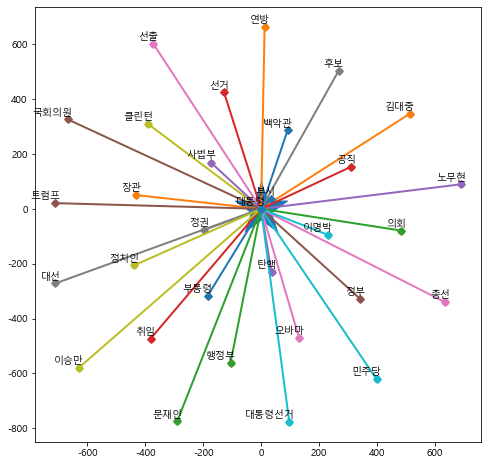

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(0,0,s=3000,marker='*')
for i in range(len(df_xy.x)):
    a = df_xy.loc[[i,30],:]
    plt.plot(a.x,a.y,'-D',linewidth=2)
    plt.scatter(df_xy.x[i],df_xy.y[i])
    plt.annotate(df_xy.words[i],xy=(df_xy.x[i],df_xy.y[i]),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
plt.scatter
plt.show()